In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("final_data_in_ML.csv",parse_dates=['Standardized_Date'])
df

,Standardized_Date,STANDARDIZED_TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,remarks category
0,2021-12-01,00:00:00,3.52301,2.10,2.70209,3.40957,No remarks,No remarks
1,2021-12-01,01:00:00,3.51043,2.84,2.77743,3.39739,No remarks,No remarks
2,2021-12-01,02:00:00,3.49087,3.12,2.79467,3.37846,No remarks,No remarks
3,2021-12-01,03:00:00,3.50543,3.44,2.79543,3.39256,No remarks,No remarks
4,2021-12-01,04:00:00,3.51556,3.72,2.79826,3.40236,No remarks,No remarks
...,...,...,...,...,...,...,...,...
24043,2024-08-28,19:00:00,3.13486,3.46,2.87175,3.03392,No remarks,No remarks
24044,2024-08-28,20:00:00,3.17401,3.63,2.85830,3.07181,No remarks,No remarks
24045,2024-08-28,21:00:00,3.13113,3.64,2.87098,3.03031,No remarks,No remarks
24046,2024-08-28,22:00:00,3.16261,3.49,2.89001,3.06077,No remarks,No remarks


In [3]:
df['DATETIME'] = pd.to_datetime(df['Standardized_Date'].astype(str) + ' ' + df['STANDARDIZED_TIME'].astype(str))
df.dtypes

Standardized_Date                  datetime64[ns]
STANDARDIZED_TIME                          object
RAW WATER FLOW IN ML                      float64
CLEAR WATER SUMP LEVEL IN Meter           float64
CLEAR WATER PUMPING FLOW ML               float64
TREATED WATER PRODUCTION IN ML            float64
REMARKS                                    object
remarks category                           object
DATETIME                           datetime64[ns]
dtype: object

In [4]:
df=df[['DATETIME','CLEAR WATER PUMPING FLOW ML','REMARKS']]
df.set_index('DATETIME', inplace=True)
df

,CLEAR WATER PUMPING FLOW ML,REMARKS
DATETIME,,
2021-12-01 00:00:00,2.70209,No remarks
2021-12-01 01:00:00,2.77743,No remarks
2021-12-01 02:00:00,2.79467,No remarks
2021-12-01 03:00:00,2.79543,No remarks
2021-12-01 04:00:00,2.79826,No remarks
...,...,...
2024-08-28 19:00:00,2.87175,No remarks
2024-08-28 20:00:00,2.85830,No remarks
2024-08-28 21:00:00,2.87098,No remarks


In [5]:
df_daily = df.resample('D').sum(numeric_only=True)
df_daily

,CLEAR WATER PUMPING FLOW ML
DATETIME,
2021-12-01,42.40192
2021-12-02,62.91389
2021-12-03,43.41464
2021-12-04,40.06170
2021-12-05,46.87842
...,...
2024-08-24,68.91871
2024-08-25,64.06335
2024-08-26,66.58816


<Axes: xlabel='DATETIME'>

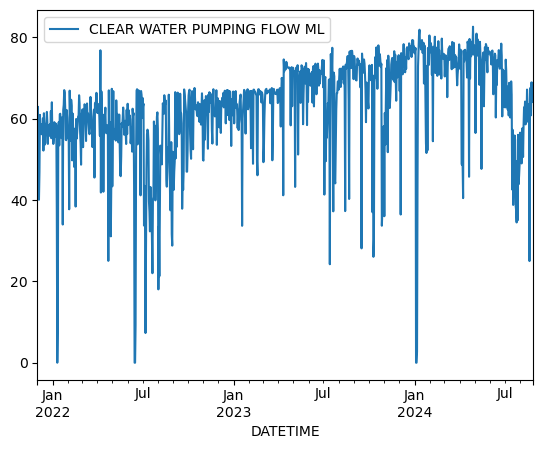

In [6]:
df_daily.plot()

In [7]:
from prophet import Prophet

In [8]:
df_final=df_daily.reset_index()[['DATETIME','CLEAR WATER PUMPING FLOW ML']].rename({'DATETIME':'ds','CLEAR WATER PUMPING FLOW ML':'y'},axis='columns')

In [9]:
df_final

,ds,y
0,2021-12-01,42.40192
1,2021-12-02,62.91389
2,2021-12-03,43.41464
3,2021-12-04,40.06170
4,2021-12-05,46.87842
...,...,...
997,2024-08-24,68.91871
998,2024-08-25,64.06335
999,2024-08-26,66.58816
1000,2024-08-27,68.81720


In [10]:
train = df_final.iloc[:-6]
test = df_final.iloc[-6:]

In [11]:
train.shape

(996, 2)

In [12]:
test.shape

(6, 2)

In [13]:
test

,ds,y
996,2024-08-23,60.80360
997,2024-08-24,68.91871
998,2024-08-25,64.06335
999,2024-08-26,66.58816
1000,2024-08-27,68.81720
1001,2024-08-28,65.00309


In [14]:
m=Prophet()

In [15]:
m.fit(train)

12:16:01 - cmdstanpy - INFO - Chain [1] start processing
12:16:01 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future=m.make_future_dataframe(periods=6)
future

,ds
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-04
4,2021-12-05
...,...
997,2024-08-24
998,2024-08-25
999,2024-08-26
1000,2024-08-27


In [17]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,50.543172,39.480830,65.454546,50.543172,50.543172,1.919357,1.919357,1.919357,-0.462180,-0.462180,-0.462180,2.381537,2.381537,2.381537,0.0,0.0,0.0,52.462529
1,2021-12-02,50.569935,39.783540,65.385140,50.569935,50.569935,2.055684,2.055684,2.055684,-0.481575,-0.481575,-0.481575,2.537260,2.537260,2.537260,0.0,0.0,0.0,52.625619
2,2021-12-03,50.596698,40.248729,65.927070,50.596698,50.596698,1.653829,1.653829,1.653829,-1.048192,-1.048192,-1.048192,2.702021,2.702021,2.702021,0.0,0.0,0.0,52.250527
3,2021-12-04,50.623461,40.954541,65.288018,50.623461,50.623461,2.572500,2.572500,2.572500,-0.303907,-0.303907,-0.303907,2.876407,2.876407,2.876407,0.0,0.0,0.0,53.195961
4,2021-12-05,50.650224,44.212428,68.449885,50.650224,50.650224,5.657844,5.657844,5.657844,2.597515,2.597515,2.597515,3.060329,3.060329,3.060329,0.0,0.0,0.0,56.308068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024-08-24,68.583456,52.943523,78.967852,68.583456,68.583456,-3.272015,-3.272015,-3.272015,-0.303907,-0.303907,-0.303907,-2.968107,-2.968107,-2.968107,0.0,0.0,0.0,65.311441
998,2024-08-25,68.581847,54.819102,81.183474,68.581847,68.581847,-0.311045,-0.311045,-0.311045,2.597515,2.597515,2.597515,-2.908560,-2.908560,-2.908560,0.0,0.0,0.0,68.270801
999,2024-08-26,68.580238,52.790590,79.078540,68.580238,68.580238,-2.961485,-2.961485,-2.961485,-0.121795,-0.121795,-0.121795,-2.839690,-2.839690,-2.839690,0.0,0.0,0.0,65.618753
1000,2024-08-27,68.578629,52.702208,78.509809,68.578629,68.578629,-2.939979,-2.939979,-2.939979,-0.179865,-0.179865,-0.179865,-2.760114,-2.760114,-2.760114,0.0,0.0,0.0,65.638650


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

forecast_test = forecast.iloc[-6:]['yhat'].round(2)
# Calculate errors
error1 = mean_squared_error(test['y'], forecast_test)
error2 = rmse(test['y'], forecast_test)
error3 = mean_absolute_percentage_error(test['y'], forecast_test)
accuracy = (1 - error3) * 100

print(f'MSE Error: {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print(f'MAPE Error: {error3:11.10}')
print(f'Accuracy: {accuracy:11.10}')

MSE Error:  9.29366387
RMSE Error:  3.04855111
MAPE Error: 0.04112175787
Accuracy: 95.88782421


In [19]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-01,52.462529,39.480830,65.454546
1,2021-12-02,52.625619,39.783540,65.385140
2,2021-12-03,52.250527,40.248729,65.927070
3,2021-12-04,53.195961,40.954541,65.288018
4,2021-12-05,56.308068,44.212428,68.449885
...,...,...,...,...
997,2024-08-24,65.311441,52.943523,78.967852
998,2024-08-25,68.270801,54.819102,81.183474
999,2024-08-26,65.618753,52.790590,79.078540
1000,2024-08-27,65.638650,52.702208,78.509809


<Axes: xlabel='ds'>

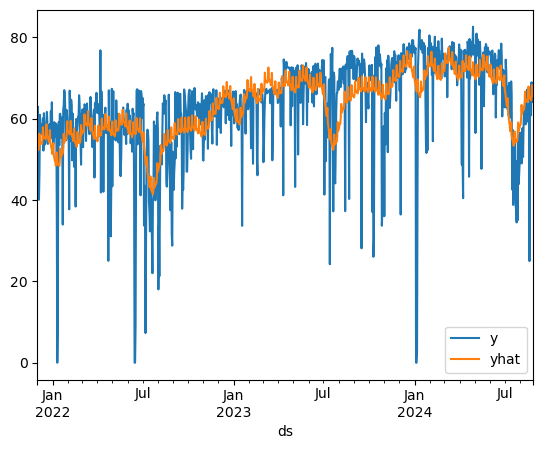

In [20]:
pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

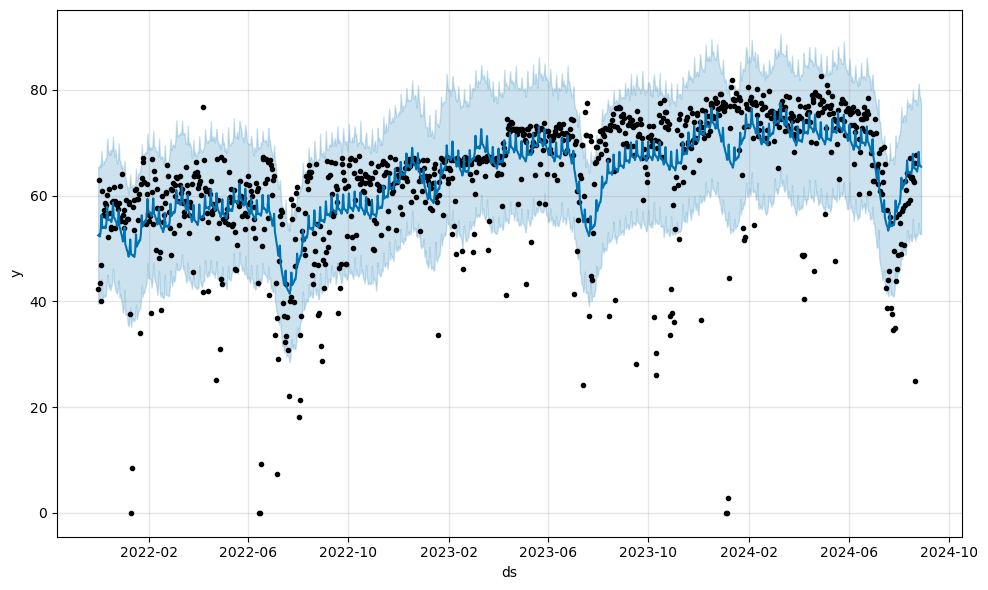

In [21]:
m.plot(forecast);

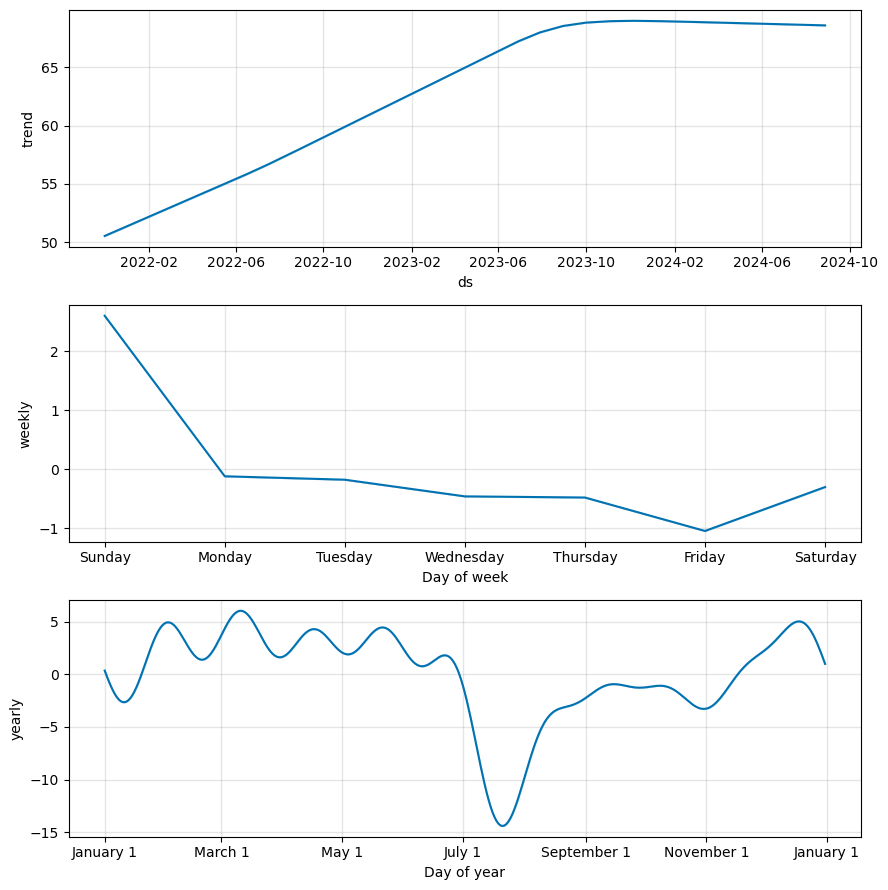

In [22]:
m.plot_components(forecast);

In [23]:
# Fit the model to the full dataset
model = Prophet()
model.fit(df_final)

# Forecast the next 4 periods
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail(10).round(2)

# Print summary and forecast
print(forecast)

12:16:04 - cmdstanpy - INFO - Chain [1] start processing
12:16:04 - cmdstanpy - INFO - Chain [1] done processing


             ds   yhat  yhat_lower  yhat_upper
1002 2024-08-29  65.47       53.26       77.82
1003 2024-08-30  64.99       51.58       77.11
1004 2024-08-31  65.91       53.74       78.49
1005 2024-09-01  68.89       56.55       81.51
1006 2024-09-02  66.34       53.18       79.40
1007 2024-09-03  66.43       53.48       78.96
1008 2024-09-04  66.26       54.38       79.46
1009 2024-09-05  66.38       54.18       78.85
1010 2024-09-06  65.92       53.11       78.63
1011 2024-09-07  66.83       54.07       79.30


<Axes: xlabel='ds'>

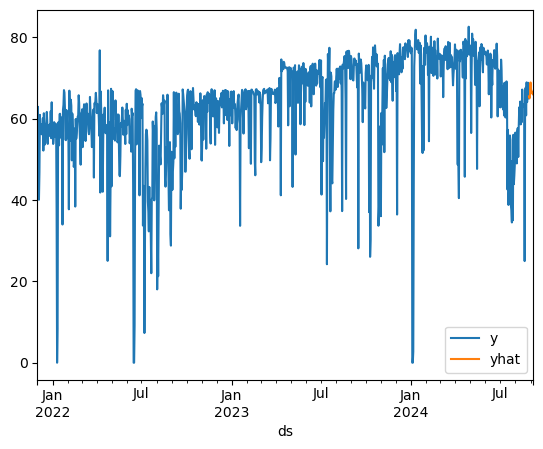

In [24]:
pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()